In [1]:
from __future__ import division

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns


In [130]:
np.random.seed(123)

In [131]:
# sample inputs
xs = np.exp(np.random.normal(size=(200,))) * 10
xs = sorted(xs)

In [132]:
xs[::10]

[0.39515787320742013,
 1.7769805414250812,
 2.8157623556455276,
 3.5029077723392259,
 4.3278391252781727,
 4.9664627102815491,
 5.7757301405018175,
 6.8442484580775274,
 7.6320211165437151,
 8.6929849498956031,
 10.20523772790575,
 11.502486151701401,
 12.889352327190393,
 14.029666789765978,
 16.48292897671914,
 20.904274694411829,
 26.61090512638452,
 32.408286224693569,
 43.576345205469231,
 57.185325491301228]

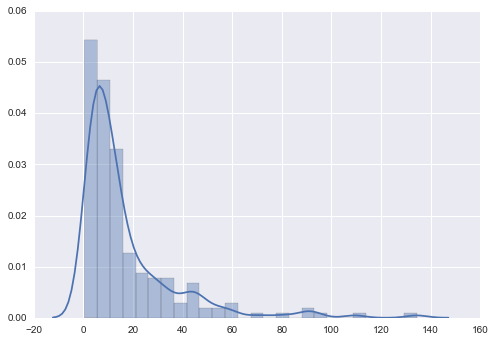

In [133]:
sns.distplot(xs)

In [134]:
shape, loc, scale = st.lognorm.fit(xs)
shape, loc, scale

(1.0282089571225324, -0.13241081082648995, 10.26766252850666)

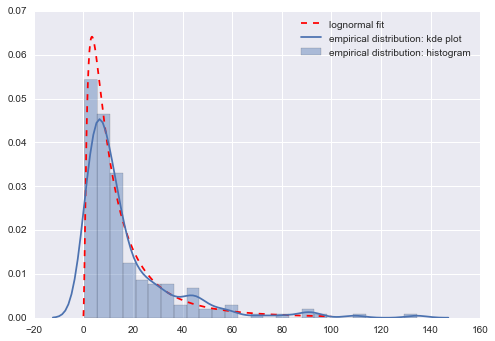

In [135]:
# distribution of inputs and a log-normal fit
pts = np.arange(0, 100, 0.1)
plt.plot(pts, st.lognorm.pdf(pts, shape, loc, scale), 'r--', label='lognormal fit')
sns.distplot(xs, label='empirical distribution: histogram', kde_kws={'label': 'empirical distribution: kde plot'})
plt.legend(loc='best')

In [136]:
rv_fit = st.lognorm.freeze(shape, loc, scale)

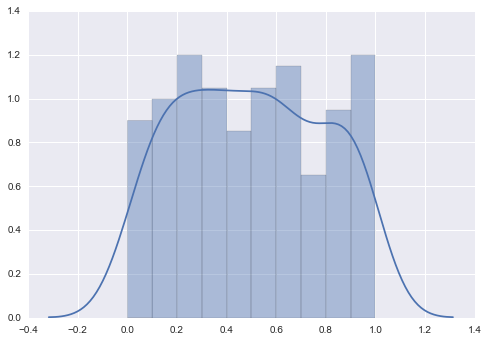

In [152]:
# cumulative probabilities
sns.distplot(rv_fit.cdf(xs), bins=np.arange(0, 1.1, 0.1))

In [153]:
ws = rv_fit.cdf(xs)
ws

array([ 0.00194445,  0.0052919 ,  0.00915604,  0.01222621,  0.0233798 ,
        0.02857254,  0.03141246,  0.03833217,  0.03945566,  0.0468981 ,
        0.05091318,  0.06357282,  0.06363573,  0.0757507 ,  0.08646251,
        0.08892855,  0.09516933,  0.09634453,  0.10235793,  0.10778446,
        0.1124541 ,  0.11486343,  0.12249826,  0.12520746,  0.14511574,
        0.14572242,  0.14618857,  0.14815393,  0.14821276,  0.14844292,
        0.15629154,  0.15859406,  0.16297365,  0.16818819,  0.17277457,
        0.18311414,  0.19260325,  0.19751026,  0.20087904,  0.20220122,
        0.20870598,  0.21043428,  0.21254424,  0.21752915,  0.21956433,
        0.22671683,  0.23137824,  0.23590584,  0.23754005,  0.23834684,
        0.24800669,  0.2513186 ,  0.25434292,  0.2666526 ,  0.26701138,
        0.27535349,  0.28579381,  0.2905536 ,  0.29441361,  0.29544779,
        0.29545917,  0.29555054,  0.30147791,  0.33083087,  0.33416463,
        0.33605338,  0.3364822 ,  0.34498285,  0.34911962,  0.34

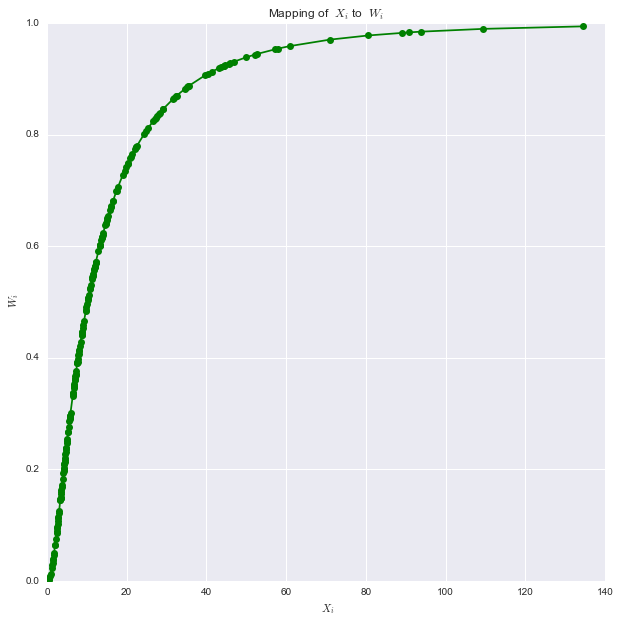

In [170]:
plt.figure(figsize=(10, 10))
plt.plot(xs, ws, 'go-')
plt.xlabel('$\ X_i$')
plt.ylabel('$\ W_i$')
plt.title(r'Mapping of $\ X_i$ to $\ W_i$')

In [182]:
# rescale W_i to form another distribution

In [183]:
# target distribution
rv_tgt = st.norm.freeze(1, 0.15)

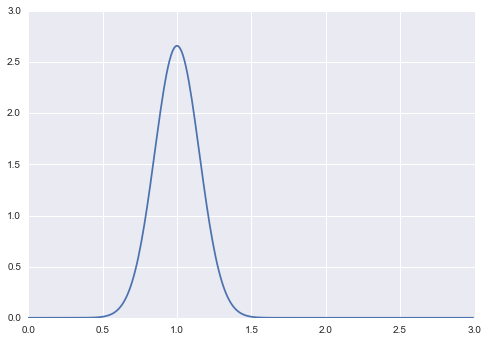

In [181]:
pts = np.arange(0, 3, 0.01)
plt.plot(pts, rv_tgt.pdf(pts))

In [189]:
# target vars
ys = rv_tgt.ppf(ws)
ys

array([ 0.5669447 ,  0.61657772,  0.64611303,  0.66250819,  0.70172931,
        0.71467007,  0.72093571,  0.73444344,  0.73644429,  0.74864441,
        0.75459052,  0.77118175,  0.77125743,  0.78486275,  0.79557023,
        0.79789264,  0.80356332,  0.8046002 ,  0.80976552,  0.81424046,
        0.81796302,  0.81984059,  0.82561173,  0.82759868,  0.84135791,
        0.8417564 ,  0.84206183,  0.84334243,  0.84338059,  0.84352977,
        0.84852748,  0.84996206,  0.85265355,  0.85579755,  0.85851136,
        0.86446587,  0.86974852,  0.87241781,  0.87422718,  0.87493233,
        0.87836209,  0.8792627 ,  0.88035634,  0.88291523,  0.88395019,
        0.88754456,  0.88985268,  0.89206983,  0.89286432,  0.89325544,
        0.89788363,  0.89944809,  0.9008672 ,  0.90655472,  0.90671845,
        0.91049484,  0.91514277,  0.91723478,  0.91891955,  0.9193692 ,
        0.91937415,  0.91941383,  0.92197681,  0.93435699,  0.93573368,
        0.93651124,  0.93668754,  0.94016476,  0.94184524,  0.94

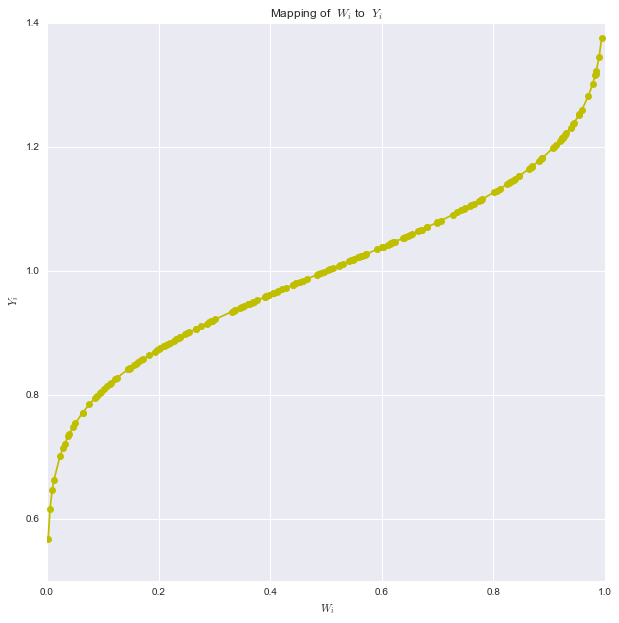

In [190]:
plt.figure(figsize=(10, 10))

plt.plot(ws, ys, 'yo-')
plt.xlabel('$\ W_i$')
plt.ylabel('$\ Y_i$')
plt.title(r'Mapping of $\ W_i$ to $\ Y_i$')



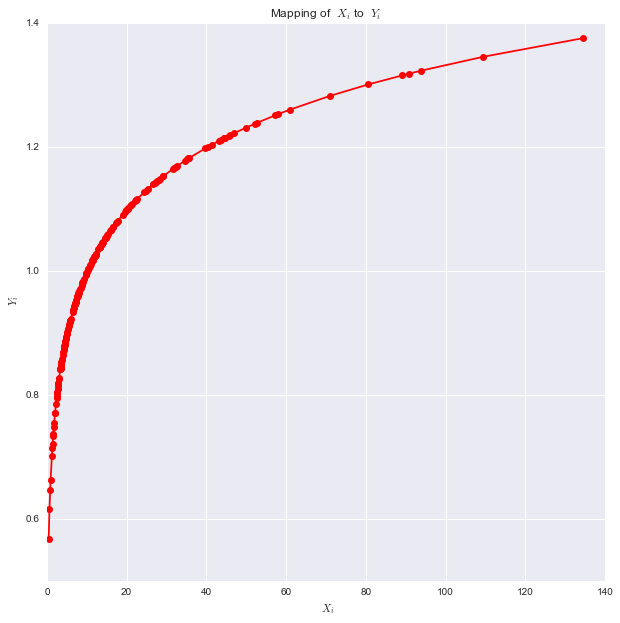

In [191]:
plt.figure(figsize=(10, 10))

plt.plot(xs, ys, 'ro-')
plt.xlabel('$\ X_i$')
plt.ylabel('$\ Y_i$')
plt.title(r'Mapping of $\ X_i$ to $\ Y_i$')



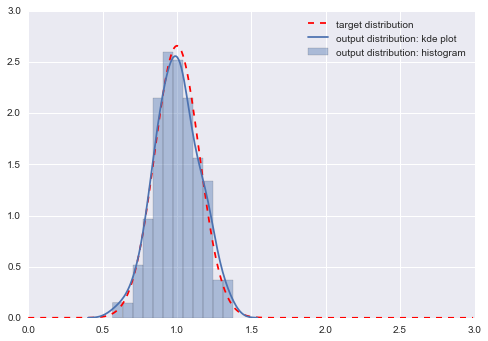

In [193]:
# distribution of inputs and a log-normal fit
plt.plot(pts, rv_tgt.pdf(pts), 'r--', label='target distribution')
sns.distplot(ys, label='output distribution: histogram', kde_kws={'label': 'output distribution: kde plot'})
plt.legend(loc='best')